<a href="https://colab.research.google.com/github/2003MADHAV/Deeplearning_project_beased_experiments-/blob/main/001_Understanding_the_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the libraries and dataset
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# We will be using the Iris Plants Database
from sklearn.datasets import load_iris

SEED = 2017

##### What is the purpose of seed in Python?

The seed() method is used to initialize the random number generator.

The random number generator needs a number to start with (a seed value), to be able to generate a random number.

By default the random number generator uses the current system time.

Seed function is used to save the state of a random function, so that it can generate same random numbers on multiple executions of the code on the same machine or on different machines

In [ ]:
# The first two classes (Iris-Setosa and Iris-Versicolour) are linear separable
iris = load_iris()
idxs = np.where(iris.target<2)
X = iris.data[idxs]
y = iris.target[idxs]

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

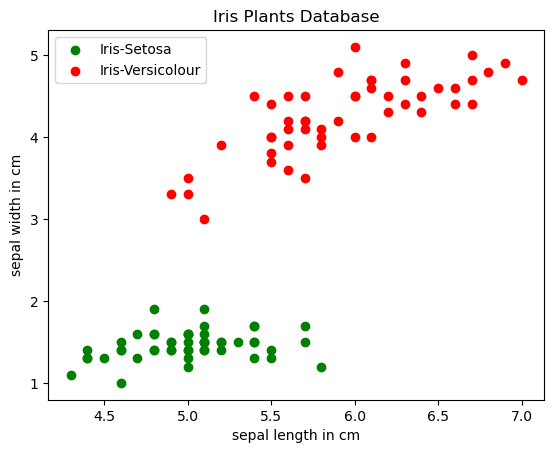

In [ ]:
# Let's plot the data for two of the four variables
plt.scatter(X[y==0][:,0],X[y==0][:,2], color='green', label='Iris-Setosa')
plt.scatter(X[y==1][:,0],X[y==1][:,2], color='red', label='Iris-Versicolour')
plt.title('Iris Plants Database')
plt.xlabel('sepal length in cm')
plt.ylabel('sepal width in cm')
plt.legend()
plt.show()

# In the following graph, we've plotted the distribution of the two classes

In [ ]:
# To validate our results, we split the data into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [ ]:
print(X_train)
print(X_val)
print(y_train)
print(y_val)

[[6.4 2.9 4.3 1.3]
 [6.1 2.8 4.7 1.2]
 [6.4 3.2 4.5 1.5]
 [6.  3.4 4.5 1.6]
 [5.1 3.4 1.5 0.2]
 [4.9 3.6 1.4 0.1]
 [4.7 3.2 1.6 0.2]
 [5.6 2.7 4.2 1.3]
 [5.5 2.4 3.8 1.1]
 [5.1 3.8 1.9 0.4]
 [5.  3.  1.6 0.2]
 [5.5 2.5 4.  1.3]
 [5.7 3.8 1.7 0.3]
 [4.8 3.  1.4 0.3]
 [5.8 4.  1.2 0.2]
 [6.6 3.  4.4 1.4]
 [5.2 4.1 1.5 0.1]
 [5.2 3.5 1.5 0.2]
 [5.7 2.8 4.5 1.3]
 [4.9 2.4 3.3 1. ]
 [5.  3.6 1.4 0.2]
 [6.3 3.3 4.7 1.6]
 [6.1 3.  4.6 1.4]
 [5.  2.3 3.3 1. ]
 [6.1 2.9 4.7 1.4]
 [5.5 2.4 3.7 1. ]
 [5.7 2.8 4.1 1.3]
 [4.6 3.4 1.4 0.3]
 [4.8 3.4 1.9 0.2]
 [6.7 3.1 4.7 1.5]
 [5.1 3.3 1.7 0.5]
 [4.5 2.3 1.3 0.3]
 [5.6 3.  4.1 1.3]
 [5.4 3.4 1.5 0.4]
 [5.1 3.8 1.6 0.2]
 [6.7 3.  5.  1.7]
 [5.1 3.8 1.5 0.3]
 [4.9 3.  1.4 0.2]
 [5.1 3.7 1.5 0.4]
 [5.7 3.  4.2 1.2]
 [5.8 2.7 3.9 1.2]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]
 [5.9 3.  4.2 1.5]
 [5.4 3.9 1.3 0.4]
 [6.2 2.2 4.5 1.5]
 [5.5 3.5 1.3 0.2]
 [5.4 3.7 1.5 0.2]
 [5.1 2.5 3.  1.1]
 [4.8 3.1 1.6 0.2]
 [6.3 2.3 4.4 1.3]
 [5.  3.5 1.6 0.6]
 [5.6 2.9 3.

In [ ]:
# Next, we initialize the weights and the bias for the perceptron

weights = np.random.normal(size=X_train.shape[1])
bias = 1

In [ ]:
print(weights)

[0.41774441 0.76262097 0.01869647 1.22737054]


In [ ]:
# Before training, we need to define the hyperparameters

learning_rate = 0.1
n_epochs = 15

In [ ]:
np.zeros(weights.shape)

array([0., 0., 0., 0.])

In [ ]:
# Now, we can start training our perceptron with a for loop

del_w = np.zeros(weights.shape)
hist_loss = []
hist_accuracy = []

for i in range(n_epochs):
    # We apply a simple step function, if the output is > 0.5 we predict 1, else 0
    output = np.where((X_train.dot(weights)+bias)>0.5, 1, 0)
    print(output)

    # Compute MSE
    error = np.mean((y_train-output)**2)
    print("Error: ", error)

    # Update weights and bias
    weights-= learning_rate * np.dot((output-y_train), X_train)
    bias += learning_rate * np.sum(np.dot((output-y_train), X_train))
    print("Weights:", weights)
    print("bias:", bias)

    # Calculate MSE
    loss = np.mean((output - y_train) ** 2)
    hist_loss.append(loss)

    # Determine validation accuracy
    output_val = np.where(X_val.dot(weights)>0.5, 1, 0)
    accuracy = np.mean(np.where(y_val==output_val, 1, 0))
    hist_accuracy.append(accuracy)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
Error:  0.5
Weights: [-19.53225559 -12.85737903  -5.81130353   0.23737054]
bias: 41.389999999999986
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
Error:  0.5
Weights: [ 4.22774441 -1.72737903 11.13869647  5.57737054]
bias: -15.79
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
Error:  0.5
Weights: [-15.72225559 -15.34737903   5.30869647   4.58737054]
bias: 24.599999999999987
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
Error:  0.5
Weights: [ 8.03774441 -4.21737903 22.25869647  9

In [ ]:
output

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1])

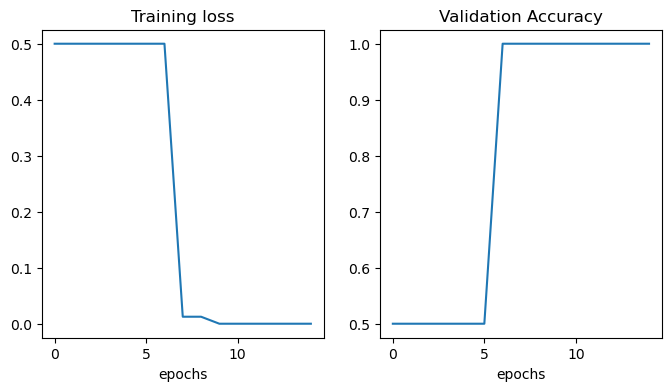

In [ ]:
# We've saved the training loss and validation accuracy so that we can plot them

fig = plt.figure(figsize=(8, 4))
a = fig.add_subplot(1,2,1)
imgplot = plt.plot(hist_loss)
plt.xlabel('epochs')
a.set_title('Training loss')

a=fig.add_subplot(1,2,2)
imgplot = plt.plot(hist_accuracy)
plt.xlabel('epochs')
a.set_title('Validation Accuracy')
plt.show()